## Algoritmo 1: Juan Diaz Monsalve

In [18]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn
import array
import sklearn.metrics as metrics
import numpy as np
import math

In [19]:
#Este metodo me guarda los indices donde esta el dos en digits.image
digits = load_digits()
numImagenes = len(digits.images)
y = digits.target # el método nos provee las etiquetas de las imágenes en un arreglo
indicesOF2 = array.array('i',[])
indicesOF8 = array.array('i',[])
def getAllInd ():
    
    j=0
    k=0
    for i in y:
        if(i==2):
            indicesOF2.append(j)
            
        if(i==8):
            indicesOF8.append(j)
        j=j+1
    #print(indicesOF2)
    print("Cantidad de 2 en los datos: "+str(len(indicesOF2)))
    print("Cantidad de 8 en los datos: "+str(len(indicesOF8)))
    print("Cantidad de datos: "+str(len(digits.images)))
    #for i in indicesOF2:
        #print(y[i])
        

getAllInd()


Cantidad de 2 en los datos: 177
Cantidad de 8 en los datos: 174
Cantidad de datos: 1797


Para el 2
[[0.00000000e+00 7.23404255e-01 9.14184397e+00 1.41560284e+01
  1.05390071e+01 2.86524823e+00 1.34751773e-01 0.00000000e+00]
 [1.41843972e-02 4.94326241e+00 1.38581560e+01 1.18652482e+01
  1.29432624e+01 6.17021277e+00 5.03546099e-01 0.00000000e+00]
 [7.09219858e-03 4.53900709e+00 8.21276596e+00 4.47517730e+00
  1.17517730e+01 6.40425532e+00 5.17730496e-01 0.00000000e+00]
 [0.00000000e+00 1.03546099e+00 2.04255319e+00 4.85106383e+00
  1.23900709e+01 4.65957447e+00 2.34042553e-01 0.00000000e+00]
 [0.00000000e+00 8.51063830e-02 1.49645390e+00 9.00709220e+00
  1.05177305e+01 2.28368794e+00 4.25531915e-02 0.00000000e+00]
 [0.00000000e+00 7.65957447e-01 5.75177305e+00 1.15106383e+01
  6.92198582e+00 1.53191489e+00 7.44680851e-01 0.00000000e+00]
 [2.12765957e-02 1.51063830e+00 1.10000000e+01 1.39929078e+01
  1.15177305e+01 9.90070922e+00 6.46808511e+00 6.59574468e-01]
 [7.09219858e-03 7.23404255e-01 9.56737589e+00 1.39503546e+01
  1.37021277e+01 1.26737589e+01 8.85106383e+00 2.2765

<Figure size 432x288 with 0 Axes>

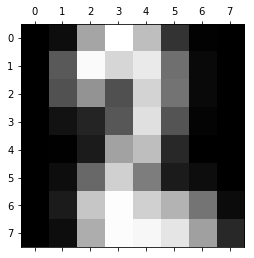

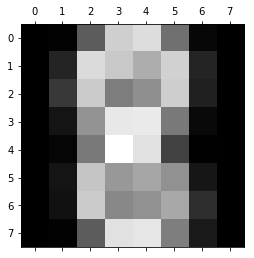

In [20]:
#Este codigo calcula la matriz promedio del dos
lenghtForDataTraining2 = math.floor(len(indicesOF2)*0.8)
lenghtForTest2 = len(indicesOF2) - lenghtForDataTraining2

lenghtForDataTraining8 = math.floor(len(indicesOF8)*0.8)
lenghtForTest8 = len(indicesOF8) - lenghtForDataTraining8

dataTraining2 = array.array('i')
dataTest2 = array.array('i')

dataTraining8 = array.array('i')
dataTest8 = array.array('i')
for i in range(0,lenghtForDataTraining2):
    dataTraining2.append(indicesOF2[i])

for i in range(lenghtForDataTraining2,len(indicesOF2)):
    dataTest2.append(indicesOF2[i])
    
for i in range(0,lenghtForDataTraining8):
    dataTraining8.append(indicesOF8[i])

for i in range(lenghtForDataTraining8,len(indicesOF8)):
    dataTest8.append(indicesOF8[i])

quantMatrix2= lenghtForDataTraining2
matrixResult2= digits.images[2]
for i in dataTraining2:
    matrixResult2= matrixResult2 + digits.images[i]
matrixResult2 = matrixResult2/quantMatrix2

quantMatrix8= lenghtForDataTraining8
matrixResult8= digits.images[8]
for i in dataTraining8:
    matrixResult8= matrixResult8 + digits.images[i]
matrixResult8 = matrixResult8/quantMatrix8

pl.gray()
pl.matshow(matrixResult2) # Imprimir una imagen dada
print("Para el 2")
print(matrixResult2) 

pl.matshow(matrixResult8) # Imprimir una imagen dada
print("Para el 8")
print(matrixResult8) 

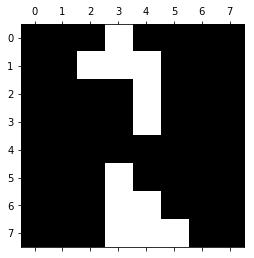

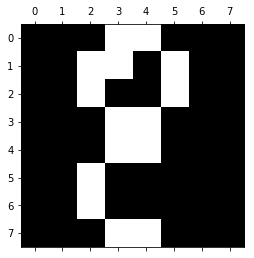

In [21]:
#Me muestra como queda si solo muestro los pixeles que cumplen un criterio
pl.matshow(matrixResult2>11)

pl.matshow(matrixResult8>11)

In [22]:
#Lanza true si cree que es un 2, false de lo contrario
def verifIsTwo(matrixTwo):
    matrixTem = matrixResult2> 11
    isTwo= "true"
    for i in range(0,8):
        for j in range(0,8):
            if(matrixTem[i][j]==1 and matrixTwo[i][j]<3):
                isTwo = "false"
    return isTwo

def verifIsEight(matrixEight):
    matrixTem8 = matrixResult8> 11
    isEight= "true"
    for i in range(0,8):
        for j in range(0,8):
            if(matrixTem8[i][j]==1 and matrixEight[i][j]<1):
                isEight = "false"
    return isEight

#Usa el anterior pasandole todos las matrices con 2 y luego todas las matrices 
def hitPerc():
    k=0
    w=0
    for i in dataTest2:
        if(verifIsTwo(digits.images[i])=="true"):
            k=k+1
    
    for i in dataTest8:
        if(verifIsEight(digits.images[i])=="true"):
            w=w+1
    
    accuracy2=(k/len(dataTest2)) * 100
    accuracy8= (w/len(dataTest8)) * 100
    return (accuracy2, accuracy8, "Total promediado: " + str((accuracy2 + accuracy8)/2))


hitPerc()    

(72.22222222222221, 60.0, 'Total promediado: 66.11111111111111')

In [23]:
def getFalsePositive():
    percentOFTwo= len(indicesOF2)/len(digits.images) *100
    twoIdentify, totalIdentify = hitPerc();
    numberIdentifyTwo= len(indicesOF2)*(twoIdentify/100)
    numberIdetify= len(digits.images)*(totalIdentify/100)
    falsePositive= numberIdetify - numberIdentifyTwo
    percentFasePositive= falsePositive/len(digits.images) * 100
    return percentFasePositive

Despues de ejecutar el codigo se obtuvo un 72.22% de aciertos verificando que un dos, cuando se testea (20%) el modelo.
El modelo de "entreno" con el 80% de numeros 2 disponibles.

Se obtuvo un 60.0% de aciertos verificando el 8, cuando se testea (20%) el modelo. El modelo se entreno con el 80% de numeros 8 disponibles.

## Algoritmo 2: Kevin Balanta Muñoz

In [24]:
#método que identifica las matrices que representan el dígito 8
def isTheEight(x):
   
    mu=0
    md = 0
    mitad = 0
    test = -1
    menoramayor = True
    actual = 0
    #se obtiene la mitad de la matriz
    if len(x)%2 == 0 :
        mitad = int(len(x)/2)
    else:
        mitad = int((len(x)/2)+1)
    #se recorre las filas  matriz
    for i in range(0,mitad) :
        actual=0
        #se recorren las columnas de la matriz
        for j in range(0,len(x[0])):
            #si es el primer recorrido test=-1
            if(test == -1):
                #se obtiene el primer valor de la matriz
                test = x[i][j]
            #sino es el primer recorrido entonces se mira el patrón
            #el patrón definido para identificar el 8 es que se trazan lineas horizontales (imaginarias), entonces el patrón debe
            #de ser "ascendente - descendente - ascendente" como mínimo (notese que el descendente corresponde al hueco de alguno de los circulos del 8)
            #entonces para resumir: la dinamica consiste en que se intenta dividir el 8 en en dos partes a la mitad de la matriz, luego por cada mitad se analiza los patrones descritos
            #que corresponden al digito 8 (haciendo cortes horizontales a lo largo del número)

            
            else:
                if(test<x[i][j] and menoramayor == True):
                    
                    test = x[i][j]
                    actual+=1
                    menoramayor= not menoramayor
                elif(test>x[i][j] and menoramayor == False):
                    test=x[i][j]
                    actual+=1
                    menoramayor=not menoramayor
            
            if(actual>=3):
                mu+=1
        
        
    test=-1
    menoramayor=True
    for i in range(mitad,len(x)):
        actual=0
        for j in range(0,len(x[0])):
            if(test == -1):
                test = x[i][j]
            else:
                if(test<x[i][j] and menoramayor==True ):
                    test = x[i][j]
                    actual+=1
                    menoramayor= not menoramayor
                elif(test>x[i][j] and menoramayor == False):
                    test=x[i][j]
                    actual+=1
                    menoramayor= not menoramayor
            
       
            if(actual>=3):
                md+=1
                
        
    
    return (mu>1 and md>=1) or (md>1 and mu>=1)


In [25]:
#aquí se crea la matriz booleana donde se identifican los 8´s 
y = digits.target
xreal = []
for i in range(0,len(y)):
    if y[i] ==8:
        xreal.append(True)
    else:
        xreal.append(False)

In [26]:
#método que identifica los 8´s por medio del método isTheEight
def prediccion():
    xx = []
    for i in range(0,len(digits.images)):
        
        if(isTheEight(digits.images[int(i)])):
            
            xx.append(True)
        else:
            
            xx.append(False)
    return xx
#se obtiene el arreglo con la predicción
xpredict = prediccion()

#se obtiene la precision del método isTheEight
metrics.accuracy_score(xreal, xpredict)




0.6766833611574847

se obtiene alrededor de una precisión del 67,6% sin una etapa de entrenamiento. Es decir, es un algoritmo No supervisado. Frente a un 72.2% de precisión de un algoritmo de aprendizaje supervisado.